In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from keras.preprocessing.text import Tokenizer




In [3]:
data = pd.read_csv('citation_sentiment_corpus.txt', sep="\t", header=None)
data.columns = ["Source_Paper_ID", "Target_Paper_ID", "Sentiment", "Citation_Text"]
data.tail()

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
8731,W98-1118,W96-0213,p,He has achieved state-of-the art results by ap...
8732,W99-0606,W96-0213,o,"B = (Brill and Wu, 1998); M = (Magerman, 1995)..."
8733,W99-0607,W96-0213,o,The model we use is similar to that of (Ratnap...
8734,W99-0607,W96-0213,p,Our model exploits the same kind of tag-n-gram...
8735,W99-0608,W96-0213,o,"In that table, TBL stands for Brill's transfor..."


In [4]:
print ("Original:", data.shape)
data = data.drop_duplicates()
data = data.reset_index(drop=True)
print ("Drop Dupicates:", data.shape)

Original: (8736, 4)
Drop Dupicates: (8734, 4)


In [5]:
X = data['Citation_Text'].values
y = data['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)

# 4. transform training data
X_train_dtm = vect.transform(X_train)
# this is faster and what most people would do
X_train_dtm = vect.fit_transform(X_train)
# 4. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

# you can see that the number of columns, 7456, is the same as what we have learned above in X_train_dtm

<1747x13976 sparse matrix of type '<class 'numpy.int64'>'
	with 48568 stored elements in Compressed Sparse Row format>

In [8]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# 3. train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 11.4 ms, sys: 2.27 ms, total: 13.7 ms
Wall time: 28.6 ms


MultinomialNB()

In [9]:
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [10]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8809387521465369

In [11]:
# print the confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred_class)

In [15]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

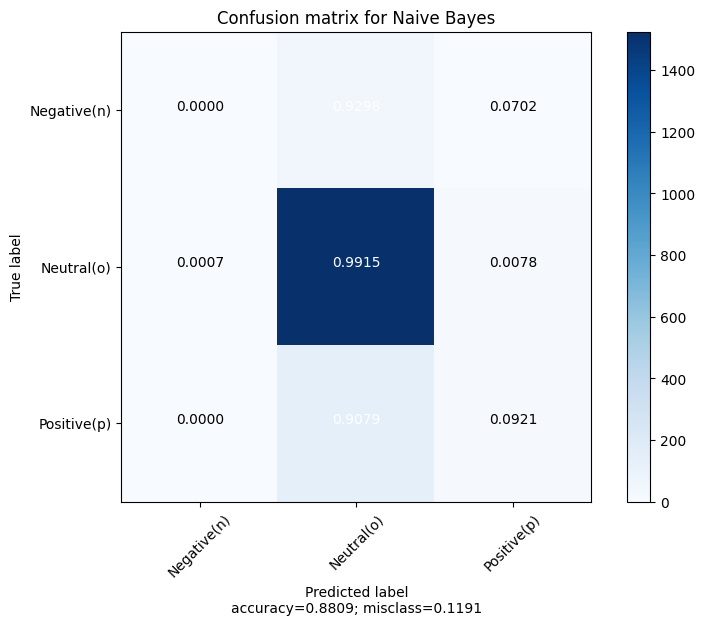

In [14]:
target_names = ["Negative(n)", "Neutral(o)", "Positive(p)"]
plot_confusion_matrix(matrix,
                          target_names,
                          title='Confusion matrix for Naive Bayes',
                          cmap=None,
                          normalize=True)

In [16]:
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have already trained your model and vectorizer as shown before

# Save the model and vectorizer
joblib.dump(nb, 'naive_bayes_model.pkl')      # Save the Naive Bayes model
joblib.dump(vect, 'vectorizer.pkl')           # Save the CountVectorizer
print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [17]:
import joblib

# Load the saved model and vectorizer
model = joblib.load('naive_bayes_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Function to make predictions
def demo_prediction(new_texts):
    # Transform the new texts
    new_texts_dtm = vectorizer.transform(new_texts)

    # Make predictions
    predictions = model.predict(new_texts_dtm)
    return predictions

# Example usage of demo_prediction
new_samples = [
    "This research provides a groundbreaking approach to the problem.",
    "The results are inconclusive and need further validation.",
    "This paper does not contribute anything new to the field."
]

predictions = demo_prediction(new_samples)
print("Predictions for new samples:", predictions)


Predictions for new samples: ['o' 'o' 'o']
